# Ridge 회귀

* 규제 항이 비용함수에 추가됨
* 가중치 벡터의 제곱항을 합한 L2 norm을 2로 나눈 값을 적용함
* 모델의 가중치가 가능한 작게 유지되도록 함
* 규제항은 훈련하는 동안에만 비용함수에 추가됨
* 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함
* 하이퍼파라미터 $\alpha$는 모델 규제를 조절
* $\alpha$ = 0이면 선형회귀와 동일하며, $\alpha$가 아주 크면 모든 가중치가 0에 가까워짐

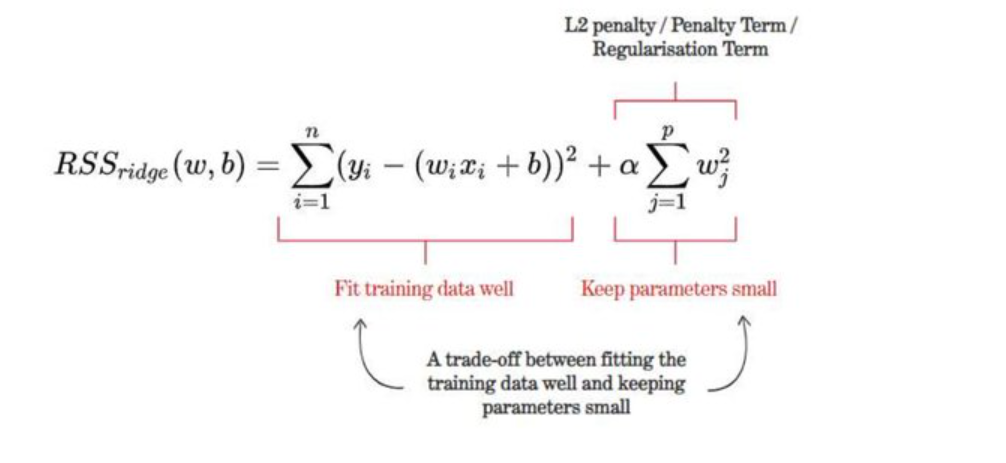

In [1]:
import pandas as pd
import numpy as np

# 레드와인 정보
redwine  = pd.read_csv('winequality-red.csv', sep=',', header=0) # header는 0번째 열에 있다.
redwine['type'] = 'red'

# 화이트와인 정보
whitewine  = pd.read_csv('winequality-white.csv', sep=';', header=0) # header는 0번째 열에 있다.
whitewine['type'] = 'white'

# 레드와인 + 화이트와인
wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(' ','_') # Coulmn명에 ' '공백이 있으면, data를 다루기 힘들기 때문에 '-'로 바꿔준다
wine.head()

X = wine.drop(['type', 'quality'], axis=1)
X.head()
y = wine.quality

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_16694/2876785728.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine = redwine.append(whitewine)


In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

0.727

# $\alpha$값 변화에 따른 계수값 변화

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_16694/2182841132.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation=90);


Text(0.5, 1.0, 'alpha = 0.05')

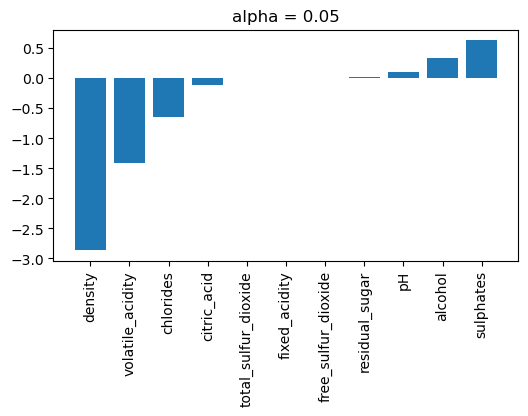

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

alpha = 0.05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation=90);
ax.set_title("alpha = {}" .format(alpha))


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_16694/666086795.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation=90);


Text(0.5, 1.0, 'alpha = 50')

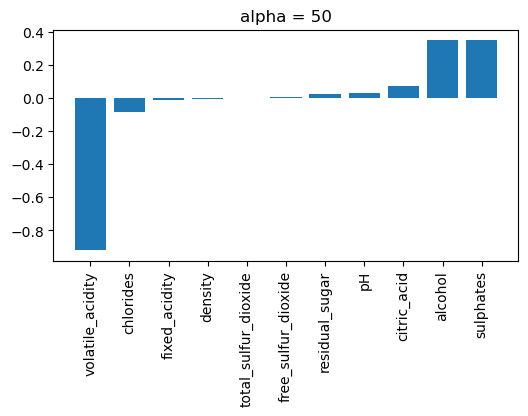

In [12]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot()

alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation=90);
ax.set_title("alpha = {}" .format(alpha))
